<a href="https://colab.research.google.com/github/alejo14171/Machine-Learning-Labs/blob/main/Minimos_Cuadrados_Lineales_y_Polinomicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import random as rnd

# N = 4 # Nivel básico

# text_predecesor = '¿Qué número es el predecesor de '
# text_sucesor = '¿Qué número es el sucesor de '
# text_mayor = '¿Qué número es mayor?'
# text_menor = '¿Qué número es menor?'

# preguntas = [text_predecesor, text_sucesor, text_mayor, text_menor]

# def respuestas_menor(nivel):
#   aux = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)']
#   for i in range(nivel):
#     print('\t', aux[i])

# def respuestas_sucesor(nivel, n):
#   aux = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)']
#   respuestas_posibles = [n-3, n-2, n-1, n, n+1, n+2]
#   rnd.shuffle(respuestas_posibles)
#   for i in range(nivel):
#     print('\t', aux[i], respuestas_posibles[i])

# for i in range(15):
#   pregunta_aleatoria = rnd.randint(0, 3)
#   if N == 3:
#     sup = 3
#     inf = 25
#   elif N == 4:
#     sup = 100
#     inf = 999
#   else:
#     sup = 10
#     inf = 20
#   aux_aleatorio = rnd.randint(sup, inf)
#   print(str(i+1)+')', preguntas[pregunta_aleatoria])
#   if pregunta_aleatoria > 1:
#      respuestas_menor(N)
#   else:
#       respuestas_sucesor(3, aux_aleatorio)


# Laboratorio 1: Mínimos Cuadrados Lineales y Polinómicos

**Presentado por: Alejandro Gómez, Oscar Eduardo Muñóz, Carolina Agudelo**\
**Asignatura: Aprendizaje de Máquina**\
**Maestría en Ing. de Sistemas y Computación** \
**Universidad Tecnológica de Pereira**

## Resumen



<p align="justify">En esta práctica de aprendizaje de máquinas, se implementarán modelos de regresión lineal y polinómica utilizando el método de mínimos cuadrados. Se realizarán diferentes pasos, como la división del conjunto de datos en entrenamiento y validación, el cálculo de los parámetros del modelo y la realización de predicciones. También se calcularán métricas de desempeño, como el coeficiente de correlación y el error cuadrático medio. En la segunda parte, se implementará un modelo polinómico regularizado y se buscará el valor óptimo del parámetro de regularización. Además, se propone inferir los valores de amplitud y velocidad angular de una señal sinusoidal utilizando el método de mínimos cuadrados.</p>


## Introducción

En este informe se presenta el desarrollo y los resultados obtenidos en el Taller Laboratorio de Mínimos Cuadrados Lineales y Polinómicos. El objetivo de este taller fue implementar modelos de regresión lineal y polinómica utilizando el método de mínimos cuadrados, así como inferir los valores de amplitud y velocidad angular de una señal sinusoidal.

El método de mínimos cuadrados es una técnica ampliamente utilizada en el campo del aprendizaje de máquinas para ajustar modelos a datos observados. Consiste en encontrar los parámetros del modelo que minimizan la suma de los cuadrados de las diferencias entre los valores predichos por el modelo y los valores reales de los datos. En el caso de la regresión lineal, se busca encontrar la mejor línea recta que se ajuste a los datos, mientras que en la regresión polinómica se busca encontrar el mejor polinomio que se ajuste a los datos.

En la primera parte del taller, se implementaron modelos de regresión lineal y polinómica sin regularización. Se realizaron diferentes pasos, como la división del conjunto de datos en entrenamiento y validación, el cálculo de los parámetros del modelo y la realización de predicciones. Además, se calcularon métricas de desempeño, como el coeficiente de correlación y el error cuadrático medio.

En la segunda parte del taller, se implementó un modelo polinómico regularizado. La regularización es una técnica que se utiliza para evitar el sobreajuste del modelo a los datos de entrenamiento. Se buscó el valor óptimo del parámetro de regularización mediante la búsqueda en una grilla de valores. Se evaluó el desempeño del modelo utilizando métricas de rendimiento y se analizaron los valores del vector de parámetros.

En la tercera parte del taller, se utilizó el método de mínimos cuadrados para inferir los valores de amplitud y velocidad angular de una señal sinusoidal. Se aplicó la serie de Maclaurin para aproximar la función seno y se calcularon los parámetros utilizando el método de mínimos cuadrados. Se evaluó el desempeño del modelo y se analizaron los resultados obtenidos .

A lo largo de este informe se presentarán los procedimientos implementados, los resultados obtenidos y se realizará un análisis de los mismos. Se incluirán ecuaciones y figuras para ilustrar los conceptos y los resultados obtenidos.

## Desarrollo del Laboratorio: Parte I (No Regularizada)


### Punto a
Clonando el repositorio para obtener el dataset.

In [2]:
!git clone "https://github.com/ChenaoB/Database.git"

Cloning into 'Database'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 49 (delta 14), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (49/49), 46.85 KiB | 3.12 MiB/s, done.
Resolving deltas: 100% (14/14), done.


### Punto b
Importando librerías necesarias y cargando el dataset obtenido en formato CSV a un dataframe.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/content/Database/DataLeastSquarePolinomial.csv")

### Punto c
Dividiendo el dataset en conjuntos de entrenamiento y validación (75% entrenamiento, 25% validación).

In [5]:
Train = df.sample(frac=0.75, random_state=42)
Test = df.drop(Train.index)

### Punto d
Construyendo la matriz $X$ y el vector $y$ asumiendo un modelo polinómico para los datos con $M = 7$.

In [6]:
# Obtenemos la cantidad de muestras del conjunto de entrenamiento.
m = Train.shape[0]

# Definimos el número de parámetros del polinomio, que es 8 en este caso.
n = 7

# Inicialización: Creamos matrices vacías para almacenar los datos de entrenamiento y prueba.
XTrain = np.zeros((m, n+1))  # La matriz X para entrenamiento.
YTrain = np.zeros((m, 1))    # El vector Y para entrenamiento.
YTest = np.zeros((Test.shape[0], 1))  # El vector Y para prueba.
XTest = np.zeros((Test.shape[0], n+1))  # La matriz X para prueba.

# Llenamos las matrices X con las potencias de la variable 'X' (polinómico).
for i in range(n+1):
  XTrain[:, i] = Train['X']**i  # Llenamos cada columna de XTrain con potencias de X.
  XTest[:, i] = Test['X']**i    # Llenamos cada columna de XTest con potencias de X.

# Llenamos los vectores Y con los valores de 'Y' del conjunto de datos.
YTrain[:,0] = Train['Y']  # Llenamos el vector YTrain con los valores de 'Y' de entrenamiento.
YTest[:,0] = Test['Y']    # Llenamos el vector YTest con los valores de 'Y' de prueba.


In [7]:
XTrain.shape

(75, 8)

### Punto e
Calculando el vector de parámetros $W$ utilizando la solución por mínimos cuadrados (ecuación 1).

   - Ecuación 1: <br>
   ![Ecuación 1](https://latex.codecogs.com/png.latex?%5Cmathbf%7BW%7D%20%3D%20%28%5Cmathbf%7BX%7D%5E%7B%5Ctop%7D%5Cmathbf%7BX%7D%29%5E%7B-1%7D%5Cmathbf%7BX%7D%5E%7B%5Ctop%7D%5Cmathbf%7By%7D)

In [8]:
# Vamos a calcular omega (w)
w = np.dot(np.linalg.inv(np.dot(np.transpose(XTrain), XTrain)), np.dot(np.transpose(XTrain), YTrain))

### Punto f
Realice la predicción sobre el conjunto de datos de entrenamiento y validación utilizando la ecuación 2.



*   Ecuación 2:
$$\hat{Y} = W^T \textbf{X}$$

Donde $\textbf{X}$ es la matriz de diseño según sea el caso (entrenamiento o validación).





In [9]:
YEstimacion_train = np.dot(XTrain, w)
YEstimacion_test = np.dot(XTest, w)

### Punto g
Grafique en un primer gráfico lo siguiente: $X_{train}$ vs $Y_{train}$ y $X_{train}$ vs $\hat{Y}_{train}$ y un
segundo gráfico con los resultados de validación: $X_{test}$ vs $Y_{test}$ y  $X_{test}$ vs $\hat{Y}_{test}$.

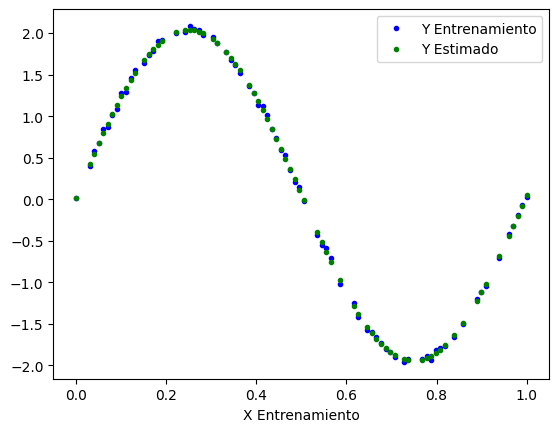

In [10]:
# Se grafican los datos de Train
plt.plot(Train['X'], Train['Y'],'.b', label='Y Entrenamiento')
plt.plot(Train['X'], YEstimacion_train,'.g', label='Y Estimado')
plt.xlabel('X Entrenamiento')
plt.legend()
plt.show()

Se tiene que hablar de este gráfico anterior

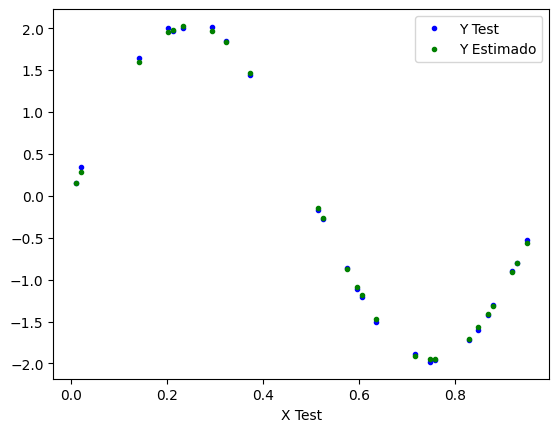

In [11]:
# Se grafican los datos de Train
plt.plot(Test['X'], Test['Y'],'.b', label='Y Test')
plt.plot(Test['X'], YEstimacion_test,'.g', label='Y Estimado')
plt.xlabel('X Test')
plt.legend()
plt.show()

Se tiene que hablar de este gráfico anterior7878

### Cálculo de métricas de desempeño del modelo

Para los resultados encontrados determine las siguientes métricas de desempeño, se sugiere el siguiente procedimiento:


### Punto a


Calcule el coeficiente de correlación de Pearson entre $Y_{\text{test}}$ y $\hat{Y}_{\text{test}}$ utilizando la ecuación 3.

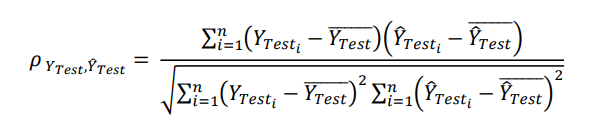

Donde $\bar{Y}_{Test}$ y $\bar{\hat{Y}}_{Test}$ son el promedio de $Y_{\text{test}}$ y $\hat{Y}_{\text{test}}$ respectivamente.

In [12]:
def coef_pearson(X, Y):
  # X es una variable y Y es otra
  # Se calcula la correlación de Pearson entre esas dos variables
  XMean = np.mean(X)
  YMean = np.mean(Y)
  num = np.dot(np.transpose(X- XMean), Y - YMean)
  den = np.sqrt(np.dot(np.transpose(X- XMean), X - XMean) * np.dot(np.transpose(Y- YMean), Y - YMean))
  aux_return = num/den
  return aux_return[0][0]

r_test = coef_pearson(YEstimacion_test, Test['Y'])
print('Coeficiente de correlación de Pearson:', r_test)

Coeficiente de correlación de Pearson: 0.9998270997524684


Se tiene que hablar de este resultado

### Punto b
Repita el procedimiento anterior para los datos de $Y_{Train}$ y $\bar{Y}_{Train}$.

In [13]:
r_train = coef_pearson(YEstimacion_train, YTrain)
print('Coeficiente de correlación de Pearson:', r_train)

Coeficiente de correlación de Pearson: 0.999790486352462


Se tiene que hablar de este resultado

### Punto c
En un mismo gráfico muestre lo siguiente: $Y_{Test}$ vs $Y_{Test}$ y $Y_{Test}$ vs $\hat{Y}_{Test}$. Qué puede concluir de este gráfico


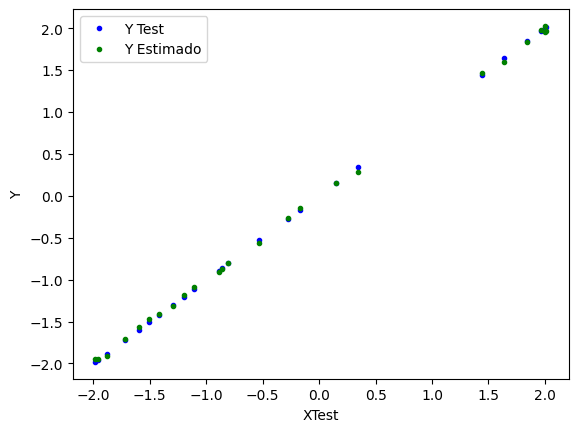

In [14]:
# Se grafican los datos de Test
plt.plot(Test['Y'], Test['Y'],'.b', label='Y Test')
plt.plot(Test['Y'], YEstimacion_test,'.g', label='Y Estimado')
plt.legend()
plt.xlabel('XTest')
plt.ylabel('Y')
plt.show()

Hablar de este resultado

### Punto d

Compute el error cuadrático medio entre $Y_{Test}$ y $\hat{Y}_{Test}$, utilice la ecuación 4.

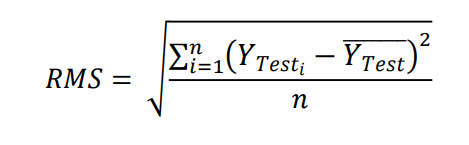

In [17]:
def rms(x, y):
  # Calcula el error cuadrático medio entre dos arrays x e y
  print(x.shape, y.shape)
  assert x.shape == y.shape, "Los tamaños de los arrays x e y deben coincidir."
  num = np.sum(np.square(x - y))  # Calcula la suma de los cuadrados de las diferencias
  den = x.size  # tamaño del array
  return np.sqrt(num / den)

rms_parte_1 = rms(Test['Y'][0], YEstimacion_test)
print('Error cuadrático medio entre el valor real de Y y su estimación:', rms_parte_1)

KeyError: ignored

Calculando coeficiente de pearson

In [ ]:
# def coef_pearson(X, Y):
#   # X es una variable y Y es otra
#   # Se calcula la correlación de Pearson entre esas dos variables
#   XMean = np.mean(X)
#   YMean = np.mean(Y)
#   num = np.dot(np.transpose(X- XMean), Y - YMean)
#   den = np.sqrt(np.dot(np.transpose(X- XMean), X - XMean) * np.dot(np.transpose(Y- YMean), Y - YMean))
#   return num/den

# YEstimacionTest = np.dot(XTest, w)
# r = coef_pearson(YEstimacionTest, Test['Y'])
# print(r)

Implementando la solución regularizada

In [ ]:
df = pd.read_csv("/content/Database/DataLeastSquarePolinomial.csv")
Train = df.sample(frac=0.8, random_state=42)
Test = df.drop(Train.index)

# Se construye la matriz X y el vector Y a partir de la teoría
m = Train.shape[0] # Cantidad de muestras
n = 45 # Número de parámetros del polinomio

XTrain = np.zeros((m, n+1))
YTrain = np.zeros((m, 1))
YTest = np.zeros((Test.shape[0], 1))
XTest = np.zeros((Test.shape[0], n+1))

# Llenamos los X
for i in range(n+1):
  XTrain[:, i] = Train['X']**i
  XTest[:, i] = Test['X']**i

# Llenamos los Y
YTrain[:,0] = Train['Y']
YTest[:,0] = Test['Y']

# Regularización
Lambda = 0.00000001
I = np.eye(n+1)

# Vamos a calcular omega (w)
w = np.dot(np.linalg.inv( np.dot(np.transpose(XTrain), XTrain) + np.dot(Lambda, I)), np.dot(np.transpose(XTrain), YTrain))

YEstimacion = np.dot(XTrain, w)

print('Lambda=', Lambda)

# Se grafican los datos de Train
plt.plot(Train['X'], Train['Y'],'.b')
plt.plot(Train['X'], YEstimacion,'.g')
plt.xlabel('XTrain')
plt.ylabel('Y')

YEstimacion = np.dot(XTest, w)

# Se grafican los datos de Test
plt.plot(Test['X'], Test['Y'],'.b')
plt.plot(Test['X'], YEstimacion,'.g')
plt.xlabel('XTest')
plt.ylabel('Y')